In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df1=pd.read_excel("/content/drive/MyDrive/Classification/Bank_dataset/Bank_dataset/Bank_file1.xlsx",header=0)
df2=pd.read_excel("/content/drive/MyDrive/Classification/Bank_dataset/Bank_dataset/Bank_file2.xlsx",header=0)
df3=pd.read_excel("/content/drive/MyDrive/Classification/Bank_dataset/Bank_dataset/bank_file3.xlsx",header=0)
df4=pd.read_excel("/content/drive/MyDrive/Classification/Bank_dataset/Bank_dataset/Bank_target file.xlsx",header=0)

In [4]:
df1.shape

(4119, 5)

In [5]:
df2.shape

(4119, 6)

In [6]:
df3.shape

(4119, 12)

In [7]:
df4.shape

(4119, 2)

In [8]:
Df1 = pd.merge(df1, df2, on='ID')

In [9]:
Df2=pd.merge(df3, df4, on='ID')

In [10]:
data=pd.merge(Df1, Df2, on='ID')

In [11]:
data

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,approved
0,C1,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,C2,39,services,single,high.school,no,no,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,C3,25,services,married,high.school,no,yes,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,C4,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,C5,47,admin.,married,university.degree,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,C4115,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,C4116,39,admin.,married,high.school,no,yes,no,telephone,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,C4117,27,student,single,high.school,no,no,no,cellular,may,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,C4118,58,admin.,married,high.school,no,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [12]:
data.dtypes

ID                 object
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
approved           object
dtype: object

In [13]:
 for col in ['ID','job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','approved']:
    data[col] = data[col].astype('category')

In [14]:
data.describe(include="all")

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,approved
count,4119,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119,...,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,4119,NaN,12,4,8,3,3,3,2,10,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,C1,NaN,admin.,married,university.degree,no,yes,no,cellular,may,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,1,NaN,1012,2509,1264,3315,2175,3349,2652,1378,...,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668
mean,NaN,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN
std,NaN,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,NaN,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,NaN,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [15]:
data.isnull().sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
approved          0
dtype: int64

In [16]:
df1.duplicated().sum()

0

In [17]:
data.dtypes

ID                category
age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
approved          category
dtype: object

<Axes: >

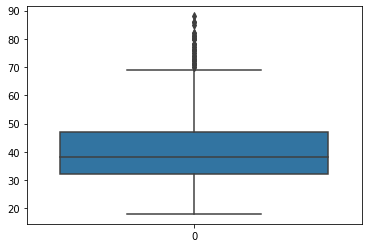

In [18]:
sns.boxplot(data["age"])

<Axes: >

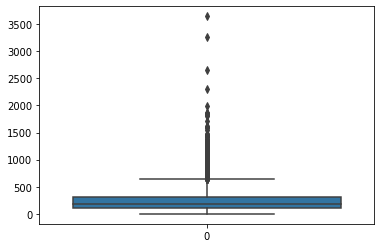

In [19]:
sns.boxplot(data['duration'])

<Axes: >

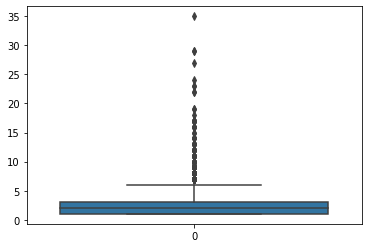

In [20]:
sns.boxplot(data['campaign'])

<Axes: >

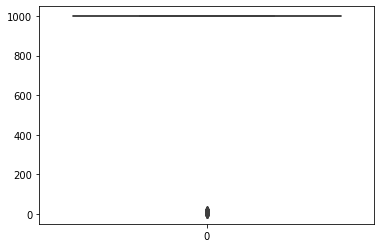

In [21]:
sns.boxplot(data['pdays'])

<Axes: >

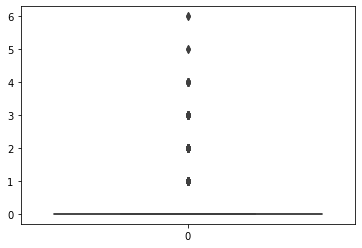

In [22]:
sns.boxplot(data['previous'])

<Axes: >

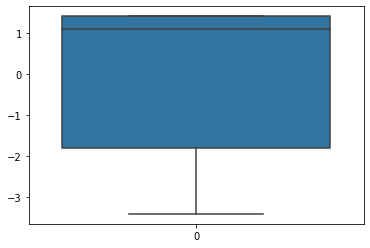

In [23]:
sns.boxplot(data['emp.var.rate'])

<Axes: >

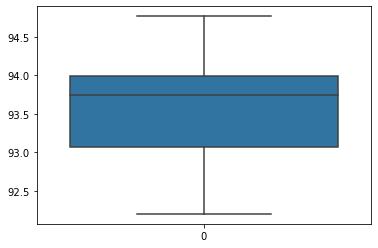

In [24]:
sns.boxplot(data['cons.price.idx'])

<Axes: >

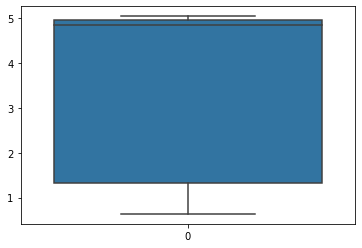

In [25]:
sns.boxplot(data["euribor3m"])

<Axes: >

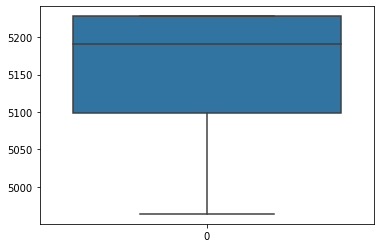

In [26]:
sns.boxplot(data["nr.employed"])

In [27]:
data.pdays.unique()

array([999,  12,   3,   6,   5,   2,  10,  11,   7,   1,  18,   4,  15,
         0,  16,   9,  19,  17,  13,  21,  14])

In [28]:
data["pdays"].value_counts(normalize=True) * 100

999    96.115562
3       1.262442
6       1.019665
4       0.339888
7       0.242777
10      0.194222
12      0.121389
5       0.097111
2       0.097111
1       0.072833
9       0.072833
16      0.048555
13      0.048555
18      0.048555
0       0.048555
15      0.048555
19      0.024278
17      0.024278
11      0.024278
21      0.024278
14      0.024278
Name: pdays, dtype: float64

In [29]:
data.previous.unique()

array([0, 2, 1, 3, 5, 4, 6])

In [30]:
data['pdays']=pd.cut(data['pdays'], [0,998,999] ,labels=["1","2"] , right=True)

In [31]:
data.drop(columns=["campaign","duration","ID"],axis=1,inplace=True)

In [32]:
data['previous'] = data['previous'].astype('category')

<ipython-input-33-1b7bbd922a1e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['emp.var.rate'], color ='red',bins=10)


<Axes: xlabel='emp.var.rate', ylabel='Density'>

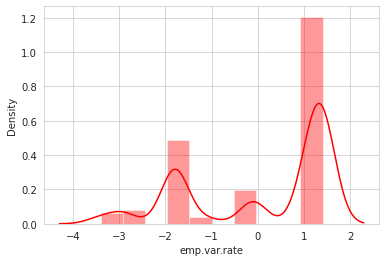

In [33]:
sns.set_style('whitegrid')
sns.distplot(data['emp.var.rate'], color ='red',bins=10)

In [34]:
data['emp.var.rate']=pd.cut(data['emp.var.rate'], [-4,-2,-1,0,2] ,labels=["1","2","3","4"] , right=True)

In [35]:
data["emp.var.rate"].value_counts(normalize=True) * 100

4    57.878126
2    25.564457
3     9.541151
1     7.016266
Name: emp.var.rate, dtype: float64

<ipython-input-36-8430d807a44b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cons.price.idx'], color ='red',bins=4)


<Axes: xlabel='cons.price.idx', ylabel='Density'>

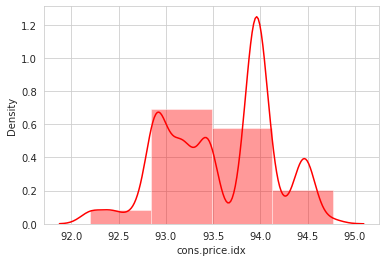

In [36]:
sns.set_style('whitegrid')
sns.distplot(data['cons.price.idx'], color ='red',bins=4)

In [37]:
data['cons.price.idx']=pd.cut(data['cons.price.idx'], [92,93,94,95] ,labels=["1","2","3"] , right=True)

<ipython-input-38-579e893ff236>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['euribor3m'], color ='red',bins=4)


<Axes: xlabel='euribor3m', ylabel='Density'>

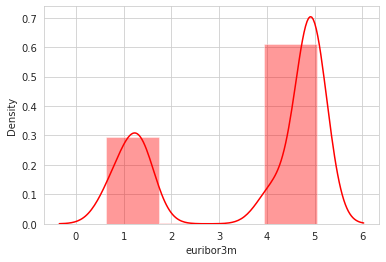

In [38]:
sns.set_style('whitegrid')
sns.distplot(data['euribor3m'], color ='red',bins=4)

In [39]:
data['euribor3m']=pd.cut(data['euribor3m'], [0,2,6] ,labels=["1","2"] , right=True)

<ipython-input-40-7deb4e0a5c9c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['nr.employed'], color ='red',bins=4)


<Axes: xlabel='nr.employed', ylabel='Density'>

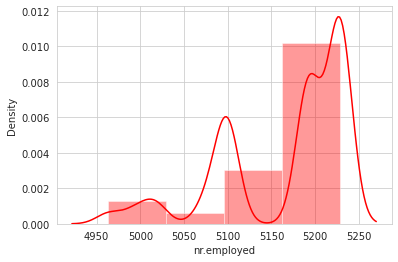

In [40]:
sns.set_style('whitegrid')
sns.distplot(data['nr.employed'], color ='red',bins=4)

In [41]:
data['nr.employed']=pd.cut(data['nr.employed'], [4900,5000,5100,5250] ,labels=["1","2","3"] , right=True)

<ipython-input-42-740b76f0d41c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], color ='red',bins=10)


<Axes: xlabel='age', ylabel='Density'>

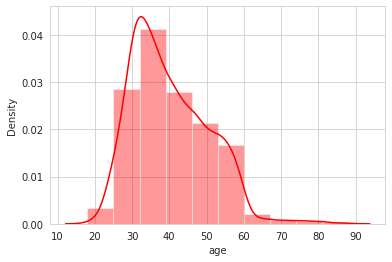

In [42]:
sns.set_style('whitegrid')
sns.distplot(data['age'], color ='red',bins=10)

In [43]:
data['age']=pd.cut(data['age'], [10,30,40,50,60,70,100] ,labels=["1","2","3","4","5","6"] , right=True)

<ipython-input-44-07fd2daa575d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cons.conf.idx'], color ='red',bins=5)


<Axes: xlabel='cons.conf.idx', ylabel='Density'>

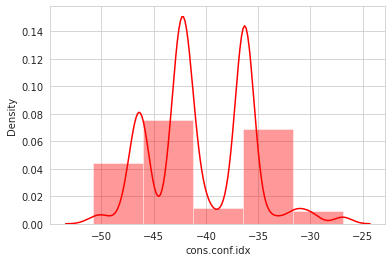

In [44]:
sns.set_style('whitegrid')
sns.distplot(data['cons.conf.idx'], color ='red',bins=5)

In [45]:
data['cons.conf.idx']=pd.cut(data['cons.conf.idx'], [-60,-40,-30,-25] ,labels=["1","2","3"] , right=True)

In [46]:
data.dtypes

age               category
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
pdays             category
previous          category
poutcome          category
emp.var.rate      category
cons.price.idx    category
cons.conf.idx     category
euribor3m         category
nr.employed       category
approved          category
dtype: object

In [47]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'approved'],
      dtype='object')

In [48]:
 for col in [ 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'approved']:
    data[col] = data[col].astype('object')

In [49]:
data.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,approved
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4117,4119,4119,4119,4119,4119,4119,4119,4119
unique,6,12,4,8,3,3,3,2,10,5,2,7,3,4,3,3,2,3,2
top,2,admin.,married,university.degree,no,yes,no,cellular,may,thu,2,0,nonexistent,4,2,1,2,3,no
freq,1614,1012,2509,1264,3315,2175,3349,2652,1378,860,3959,3523,3523,2384,2606,2486,2777,2777,3668


In [50]:
data["job"].value_counts(normalize=True) * 100

admin.           24.569070
blue-collar      21.461520
technician       16.775916
services          9.541151
management        7.865987
retired           4.030104
self-employed     3.860160
entrepreneur      3.593105
unemployed        2.694829
housemaid         2.670551
student           1.990774
unknown           0.946832
Name: job, dtype: float64

In [51]:
data['job'].mask(data['job'] == "admin.", 1, inplace=True)
data['job'].mask(data['job'] ==  "blue-collar", 2, inplace=True)
data['job'].mask(data['job'] ==  "technician", 3, inplace=True)
data['job'].mask(data['job'] ==  "services", 4, inplace=True)
data['job'].mask(data['job'] ==  "management", 5, inplace=True)
data['job'].mask(data['job'] ==  "retired", 6, inplace=True)
data['job'].mask(data['job'] ==  "self-employed", 7, inplace=True)
data['job'].mask(data['job'] ==  "entrepreneur", 8, inplace=True)
data['job'].mask(data['job'] ==  "unemployed", 9, inplace=True)
data['job'].mask(data['job'] ==  "housemaid", 10, inplace=True)
data['job'].mask(data['job'] ==  "student", 11, inplace=True)
data['job'].mask(data['job'] ==  "unknown", 12, inplace=True)


In [52]:
data["marital"].value_counts(normalize=True) * 100

married     60.912843
single      27.992231
divorced    10.827871
unknown      0.267055
Name: marital, dtype: float64

In [53]:
data['marital'].mask(data['marital'] == "married", 1, inplace=True)
data['marital'].mask(data['marital'] == "single", 2, inplace=True)
data['marital'].mask(data['marital'] == "divorced", 3, inplace=True)
data['marital'].mask(data['marital'] == "unknown", 4, inplace=True)

In [54]:
data["education"].value_counts(normalize=True) * 100

university.degree      30.687060
high.school            22.359796
basic.9y               13.935421
professional.course    12.988589
basic.4y               10.415149
basic.6y                5.535324
unknown                 4.054382
illiterate              0.024278
Name: education, dtype: float64

In [55]:
data['education'].mask(data['education'] == "university.degree", 1, inplace=True)
data['education'].mask(data['education'] ==  "high.school", 2, inplace=True)
data['education'].mask(data['education'] ==  "basic.9y", 3, inplace=True)
data['education'].mask(data['education'] ==  "professional.course", 4, inplace=True)
data['education'].mask(data['education'] ==  "basic.4y", 5, inplace=True)
data['education'].mask(data['education'] ==  "basic.6y", 6, inplace=True)
data['education'].mask(data['education'] ==  "unknown", 7, inplace=True)
data['education'].mask(data['education'] ==  "illiterate", 8, inplace=True)

In [56]:
data["default"].value_counts(normalize=True) * 100

no         80.480699
unknown    19.495023
yes         0.024278
Name: default, dtype: float64

In [57]:
data['default'].mask(data['default'] == "no", 1, inplace=True)
data['default'].mask(data['default'] ==  "unknown", 2, inplace=True)
data['default'].mask(data['default'] ==  "yes", 3, inplace=True)

In [58]:
data["housing"].value_counts(normalize=True) * 100

yes        52.804079
no         44.646759
unknown     2.549162
Name: housing, dtype: float64

In [59]:
data['housing'].mask(data['housing'] == "no", 1, inplace=True)
data['housing'].mask(data['housing'] ==  "unknown", 2, inplace=True)
data['housing'].mask(data['housing'] ==  "yes", 3, inplace=True)

In [60]:
data["loan"].value_counts(normalize=True) * 100

no         81.306142
yes        16.144695
unknown     2.549162
Name: loan, dtype: float64

In [61]:
data['loan'].mask(data['loan'] == "no", 1, inplace=True)
data['loan'].mask(data['loan'] ==  "unknown", 2, inplace=True)
data['loan'].mask(data['loan'] ==  "yes", 3, inplace=True)

In [62]:
data["contact"].value_counts(normalize=True) * 100

cellular     64.384559
telephone    35.615441
Name: contact, dtype: float64

In [63]:
data['contact'].mask(data['contact'] == "cellular", 1, inplace=True)
data['contact'].mask(data['contact'] ==  "telephone", 2, inplace=True)

In [64]:
data["month"].value_counts(normalize=True) * 100

may    33.454722
jul    17.261471
aug    15.440641
jun    12.867201
nov    10.827871
apr     5.219714
oct     1.675164
sep     1.553775
mar     1.165331
dec     0.534110
Name: month, dtype: float64

In [65]:
data['month'].mask(data['month'] == "may", 1, inplace=True)
data['month'].mask(data['month'] == "jul", 2, inplace=True)
data['month'].mask(data['month'] == "aug", 3, inplace=True)
data['month'].mask(data['month'] == "jun", 4, inplace=True)
data['month'].mask(data['month'] == "nov", 5, inplace=True)
data['month'].mask(data['month'] == "apr", 6, inplace=True)
data['month'].mask(data['month'] == "oct", 7, inplace=True)
data['month'].mask(data['month'] == "sep", 8, inplace=True)
data['month'].mask(data['month'] == "mar", 9, inplace=True)
data['month'].mask(data['month'] == "dec", 10, inplace=True)

In [67]:
data["day_of_week"].value_counts(normalize=True) * 100

thu    20.878854
mon    20.757465
tue    20.417577
wed    19.300801
fri    18.645302
Name: day_of_week, dtype: float64

In [68]:
data['day_of_week'].mask(data['day_of_week'] == "thu", 1, inplace=True)
data['day_of_week'].mask(data['day_of_week'] == "mon", 2, inplace=True)
data['day_of_week'].mask(data['day_of_week'] == "tue", 3, inplace=True)
data['day_of_week'].mask(data['day_of_week'] == "wed", 4, inplace=True)
data['day_of_week'].mask(data['day_of_week'] == "fri", 5, inplace=True)

In [69]:
data["poutcome"].value_counts(normalize=True) * 100

nonexistent    85.530469
failure        11.022093
success         3.447439
Name: poutcome, dtype: float64

In [70]:
data['poutcome'].mask(data['poutcome'] == "nonexistent", 1, inplace=True)
data['poutcome'].mask(data['poutcome'] == "failure", 2, inplace=True)
data['poutcome'].mask(data['poutcome'] == "success", 3, inplace=True)

In [75]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
approved          0
dtype: int64

In [74]:
data["pdays"] = data["pdays"].fillna(data["pdays"].mode()[0])

In [79]:
data['approved'].mask(data['approved'] == "yes", 1, inplace=True)
data['approved'].mask(data['approved'] ==  "no", 0, inplace=True)

In [80]:
 for col in [ 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'approved']:
    data[col] = data[col].astype('int')

In [78]:
data.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,approved
count,4119.00000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3668
mean,2.46419,3.594805,1.504491,2.830299,1.195436,2.081573,1.348386,1.356154,2.912115,2.940762,1.961641,0.190337,1.179170,3.182811,1.924496,1.412964,1.674193,2.632921,NaN
std,1.04680,2.730164,0.694750,1.767054,0.397196,0.983915,0.741647,0.478920,1.968066,1.406599,0.192084,0.541788,0.464832,1.040153,0.601423,0.524890,0.468733,0.561207,NaN
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,2.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,NaN
50%,2.00000,3.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,1.000000,4.000000,2.000000,1.000000,2.000000,3.000000,NaN
75%,3.00000,5.000000,2.000000,4.000000,1.000000,3.000000,1.000000,2.000000,4.000000,4.000000,2.000000,0.000000,1.000000,4.000000,2.000000,2.000000,2.000000,3.000000,NaN


In [81]:
X = data.drop('approved', axis=1)
y = data['approved']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=321)

In [83]:
from scipy.stats import chi2_contingency

class CHAIDDecisionTree:
    def __init__(self, alpha=0.05, min_samples_split=5, max_depth=None):
        self.alpha = alpha
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
    
    def fit(self, X, y):
        self.target_variable = y.name
        data = pd.concat([X, y], axis=1)
        self.tree = self._build_tree(data, depth=1)
    
    def predict(self, X):
        return X.apply(self._traverse_tree, axis=1)
    
    def _build_tree(self, data, depth):
        if data[self.target_variable].nunique() == 1 or \
           (self.max_depth is not None and depth > self.max_depth) or \
           len(data) < self.min_samples_split:
            return data[self.target_variable].mode().iloc[0]
        
        best_variable = None
        best_p = 1
        for variable in data.columns:
            if variable == self.target_variable:
                continue
            table = pd.crosstab(data[variable], data[self.target_variable])
            chi2, p, dof, expected = chi2_contingency(table)
            if p < best_p:
                best_variable = variable
                best_p = p
        
        if best_p > self.alpha:
            return data[self.target_variable].mode().iloc[0]
        
        tree = {best_variable: {}}
        for group in self._split_data(data, best_variable):
            value = group[best_variable].iloc[0]
            subtree = self._build_tree(group, depth+1)
            tree[best_variable][value] = subtree
        
        return tree
    
    def _split_data(self, data, variable):
        groups = data.groupby(variable)
        return [groups.get_group(x) for x in groups.groups]
    
    def _traverse_tree(self, row):
        node = self.tree
        while isinstance(node, dict):
            variable = list(node.keys())[0]
            value = row[variable]
            node = node[variable][value]
        return node


In [84]:
model1 = CHAIDDecisionTree(alpha=0.05,min_samples_split=5,max_depth=5)
model1.fit(X, y)

In [85]:
train_pred=model1.predict(X_train)
test_pred=model1.predict(X_test)

In [86]:
def accuracy(actual,pridicted):
    accuracy = np.mean(actual == pridicted)
    return accuracy

In [87]:
accuracy(y_train,train_pred)

0.912244190079778

In [88]:
accuracy(y_test,test_pred)

0.9085760517799353

In [89]:
model2 = CHAIDDecisionTree(alpha=0.4,min_samples_split=2,max_depth=7)
model2.fit(X, y)

In [90]:
train_pred1=model2.predict(X_train)
test_pred1=model2.predict(X_test)

In [91]:
accuracy(y_train,train_pred1)

0.9535206382240722

In [92]:
accuracy(y_test,test_pred1)

0.9546925566343042

In [93]:
model3 = CHAIDDecisionTree(alpha=0.7,min_samples_split=2,max_depth=10)
model3.fit(X, y)

In [94]:
train_pred2=model3.predict(X_train)
test_pred2=model3.predict(X_test)

In [95]:
accuracy(y_train,train_pred2)

0.9691293791189733

In [96]:
accuracy(y_test,test_pred2)

0.9741100323624595